## Task 1 : Read acw_user_data.csv with csv library.

### Import csv and read the acw_user_data. 
### Create error_row (empty) list, iterate through the csv_reader and append the empty list to the line number where the errors exist

In [2]:
from google.colab import files 
files=files.upload()

Saving acw_user_data.csv to acw_user_data.csv


In [3]:
import csv

with open('acw_user_data.csv', 'r') as csv_file:
    csv_reader = csv.reader( csv_file, delimiter=',')
    
    error_row = []
    for line_number, line in enumerate(csv_reader):
            if line_number == 0: # First line
                continue
                #print(line_number, line)
            if line[10] == "":
                error_row.append(line_number) 

## Task 2: Convert csv (flat strustures) into nested structures.

### Load csv file, create header list and extract the column names with next() method and print header list       
### Iterate through the csv_reader row by row to create acw_user_dataset (lists of variable that represents each row in csv file)

In [4]:
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.reader( csv_file, delimiter=',' )
    header = next(csv_reader)
    print(header)
    
    acw_user_dataset = [line_number for line_number in csv_reader]

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (£)', 'Retired', 'Yearly Salary (£)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


### Cast all the values read in the file appropriately to their respective types by iterating through acw_user_dataset . 

In [5]:
from datetime import datetime

for line in acw_user_dataset[:]:
    line[3] = int(line[3])
    line[8] = int(line[8])
    line[9] = int(line[9])
    line[15] = int(line[15])
    line[17] = int(line[17])
    line[21] = int(line[21])
    line[4] = float(line[4])
    if line[16] in ('True', 'TRUE', 'true', 'Yes', 'YES', 'yes'):
        line[16] = True
    if line[16] in ('False', 'FALSE', 'false', 'No', 'NO', 'no' ):
        line[16] = False 
    line[6] = datetime.strptime(line[6], "%m/%y")
    line[6] = line[6].strftime("%m/%y")
    line[7] = datetime.strptime(line[7], "%m/%y")
    line[7] = line[7].strftime("%m/%y")

### Grouped feature attributes in acw_user_dataset
### Create header dictionary which will be useful to create individual dictionaries for each feature attributes.

In [6]:
personal_details = ['First Name', 'Last Name', 'Age (Years)', 'Sex', 'Marital Status', 'Dependants']
address_details = ['Address Street', 'Address City', 'Address Postcode']
work_details = ['Employer Company', 'Distance Commuted to Work (miles)', 'Yearly Salary (£)', 'Retired', 'Yearly Pension (£)']
credit_card_details = ['Bank IBAN', 'Credit Card Number', 'Credit Card CVV', 'Credit Card Start Date', 'Credit Card Expiry Date']
vehicle_details = ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


header_dict = {key:value for value, key in enumerate(header)}
header_dict

{'Address Street': 0,
 'Address City': 1,
 'Address Postcode': 2,
 'Age (Years)': 3,
 'Distance Commuted to Work (miles)': 4,
 'Employer Company': 5,
 'Credit Card Start Date': 6,
 'Credit Card Expiry Date': 7,
 'Credit Card Number': 8,
 'Credit Card CVV': 9,
 'Dependants': 10,
 'First Name': 11,
 'Bank IBAN': 12,
 'Last Name': 13,
 'Marital Status': 14,
 'Yearly Pension (£)': 15,
 'Retired': 16,
 'Yearly Salary (£)': 17,
 'Sex': 18,
 'Vehicle Make': 19,
 'Vehicle Model': 20,
 'Vehicle Year': 21,
 'Vehicle Type': 22}

### To Nest the flat structures
#### Create empty list
#### Create dictionaries with feature and attributes of every customer by iterating through the acw_user_dataset
#### Create a dictionary which contains all customers' feature and attributes in the file (dictionaries inside dictionary) 
#### Append the dictionary for all customers [dictionaries inside dictionary (row_dict)] to the empty list.....
#### to form the list of all customers with different features and their attributes.

In [7]:
customers_list = []

for item, row in enumerate(acw_user_dataset, 2):
    
    personal_dict = {}
    for key in personal_details:
        personal_dict[key] = row[header_dict[key]]
        
    address_dict = {}
    for key in address_details:
        address_dict[key] = row[header_dict[key]]  
        
    work_dict = {}
    for key in work_details:
        work_dict[key] = row[header_dict[key]]
        
    credit_card_dict = {}
    for key in credit_card_details:
        credit_card_dict[key] = row[header_dict[key]]
        
    vehicle_dict = {}
    for key in vehicle_details:
        vehicle_dict[key] = row[header_dict[key]]
        
    row_dict = {'personal_details':personal_dict, 'address_details':address_dict, 'work_details':work_dict,
               'credit_card_details':credit_card_dict, 'vehicle_details':vehicle_dict}
    
    customers_list.append(row_dict)
customers_list[50]

{'personal_details': {'First Name': 'Grace',
  'Last Name': 'Davies',
  'Age (Years)': 57,
  'Sex': 'Female',
  'Marital Status': 'married or civil partner',
  'Dependants': '2'},
 'address_details': {'Address Street': 'Studio 88 Collins fords',
  'Address City': 'Lake Howard',
  'Address Postcode': 'W4 0AA'},
 'work_details': {'Employer Company': 'Collins Group',
  'Distance Commuted to Work (miles)': 18.78,
  'Yearly Salary (£)': 87098,
  'Retired': False,
  'Yearly Pension (£)': 0},
 'credit_card_details': {'Bank IBAN': 'GB51LSRK16179476021409',
  'Credit Card Number': 4570776433251267822,
  'Credit Card CVV': 132,
  'Credit Card Start Date': '04/19',
  'Credit Card Expiry Date': '10/25'},
 'vehicle_details': {'Vehicle Make': 'Chrysler',
  'Vehicle Model': 'Sierra 3500 HD Crew Cab',
  'Vehicle Year': 2006,
  'Vehicle Type': 'Sedan'}}

## Task 3: Print a list which contains all rows where error corrections take place.

In [8]:
print('The problematic rows for dependants:', error_row)

The problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## Task 4 : Write all records of the customers_list to a processed.json file in the JSON data format.
### Write a json file; processed.json with all records in the customers_list
### Read the processed.json file as customers_details

In [9]:
import json

with open('processed.json', mode='w') as processed_file:
    json.dump(customers_list, processed_file)

In [10]:
with open('processed.json', mode='r') as processed_file:
    customers_details = json.load(processed_file)

    
customers_details[99]

{'personal_details': {'First Name': 'Joel',
  'Last Name': 'Williams',
  'Age (Years)': 79,
  'Sex': 'Male',
  'Marital Status': 'divorced',
  'Dependants': '2'},
 'address_details': {'Address Street': 'Flat 72Z Clark estates',
  'Address City': 'West Garry',
  'Address Postcode': 'KW9 6QU'},
 'work_details': {'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': 0.0,
  'Yearly Salary (£)': 27904,
  'Retired': True,
  'Yearly Pension (£)': 18184},
 'credit_card_details': {'Bank IBAN': 'GB04OPMS12664739515711',
  'Credit Card Number': 3522456870688436,
  'Credit Card CVV': 333,
  'Credit Card Start Date': '11/16',
  'Credit Card Expiry Date': '08/19'},
 'vehicle_details': {'Vehicle Make': 'Chevrolet',
  'Vehicle Model': 'F350 Super Duty Regular Cab',
  'Vehicle Year': 2005,
  'Vehicle Type': 'Coupe, Sedan, Convertible'}}

## Task 5 : Create two additional file outputs, retired.json and employed.json, these should contain all retired and employed customers 
### Create two empty lists; retired_customers and employed_customers
### Iterate through the customers_list to get the lists of retired_customers and employed_customers respectively

In [11]:
retired_customers = []
employed_customers = []

for line in customers_list: 
    if line['work_details']['Retired'] == True:
        retired_customers.append(line) 
    else:
        employed_customers.append(line)

### Create a retired.json file with the list of retired_customers
### Read the retired.json file as the retired_customers

In [12]:
with open('retired.json', mode='w') as retired_file:
    json.dump(retired_customers, retired_file)

In [13]:
with open('retired.json', mode='r') as retired_file:
    retired_customers = json.load(retired_file)
retired_customers[1]

{'personal_details': {'First Name': 'Clive',
  'Last Name': 'Evans',
  'Age (Years)': 67,
  'Sex': 'Male',
  'Marital Status': 'single',
  'Dependants': '1'},
 'address_details': {'Address Street': '81 Goodwin dam',
  'Address City': 'Griffinstad',
  'Address Postcode': 'G3 7ZX'},
 'work_details': {'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': 0.0,
  'Yearly Salary (£)': 27964,
  'Retired': True,
  'Yearly Pension (£)': 28075},
 'credit_card_details': {'Bank IBAN': 'GB04VSAZ69128049616822',
  'Credit Card Number': 213199489183130,
  'Credit Card CVV': 389,
  'Credit Card Start Date': '07/15',
  'Credit Card Expiry Date': '04/27'},
 'vehicle_details': {'Vehicle Make': 'Volvo',
  'Vehicle Model': 'Express 3500 Passenger',
  'Vehicle Year': 2013,
  'Vehicle Type': 'SUV'}}

### Create an employed.json file with the list employed_customers
### Read the employed.json file as the employed_customers

In [14]:
with open('employed.json', mode='w') as employed_file:
    json.dump(employed_customers, employed_file)

In [15]:
with open('employed.json', mode='r') as employed_file:
    employed_customers = json.load(employed_file)
employed_customers[1]

{'personal_details': {'First Name': 'Antony',
  'Last Name': 'Jones',
  'Age (Years)': 22,
  'Sex': 'Male',
  'Marital Status': 'married or civil partner',
  'Dependants': '1'},
 'address_details': {'Address Street': 'Studio 33K Joel walk',
  'Address City': 'Randallborough',
  'Address Postcode': 'ME3N 1GH'},
 'work_details': {'Employer Company': 'Hill-Wright',
  'Distance Commuted to Work (miles)': 16.02,
  'Yearly Salary (£)': 68049,
  'Retired': False,
  'Yearly Pension (£)': 0},
 'credit_card_details': {'Bank IBAN': 'GB40CVUE84011545859591',
  'Credit Card Number': 4091726363083888495,
  'Credit Card CVV': 422,
  'Credit Card Start Date': '11/19',
  'Credit Card Expiry Date': '07/27'},
 'vehicle_details': {'Vehicle Make': 'GMC',
  'Vehicle Model': 'Achieva',
  'Vehicle Year': 2015,
  'Vehicle Type': 'Convertible, Coupe'}}

## Task 6 : Create remove_ccard.json
### Create an empty list; remove_ccard
### Convert date_string object to datetime for both start_date and expiry_date
### Convert datetime to numpy datetime64 for both dates
### Subtract the date_2(start_date) from the date_1(expiry_date) to get the date difference in days
### Convert the date difference in days(delta_time) to integers
### Iterate through the customers_list to extract all the customers that have more than 10 years between their start and end date
### Append all the customers with more than 10 years between their start and end date to the empty list

In [16]:
import numpy as np
remove_ccard = []

for line in customers_list:
    expiry_date = line['credit_card_details']['Credit Card Expiry Date']
    start_date = line['credit_card_details']['Credit Card Start Date']

    date_1 = datetime.strptime(expiry_date, "%m/%y").date()
    date_2 = datetime.strptime(start_date, "%m/%y").date()

    date_1 = np.datetime64(date_1)
    date_2 = np.datetime64(date_2)

    delta_time = (date_1 - date_2)
    delta_time = delta_time.astype('int')
    
    if delta_time > 3650:              # 10 years (1 year = 365days)
        remove_ccard.append(line)

### Create a remove_ccard.json file with the list of customers with more than 10 years between their start and end date to the empty list
### Read the remove_ccard.json as the remove_ccard

In [17]:
with open('remove_ccard.json', mode='w') as remove_ccard_file:
    json.dump(remove_ccard, remove_ccard_file)

In [18]:
with open('remove_ccard.json', mode='r') as remove_ccard_file:
    remove_ccard = json.load(remove_ccard_file)
remove_ccard[6]

{'personal_details': {'First Name': 'Helen',
  'Last Name': 'Kaur',
  'Age (Years)': 82,
  'Sex': 'Female',
  'Marital Status': 'single',
  'Dependants': '5'},
 'address_details': {'Address Street': 'Flat 47 Godfrey road',
  'Address City': 'West Brianfurt',
  'Address Postcode': 'S6G 3HB'},
 'work_details': {'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': 0.0,
  'Yearly Salary (£)': 80297,
  'Retired': True,
  'Yearly Pension (£)': 28731},
 'credit_card_details': {'Bank IBAN': 'GB42TNFG09550061109890',
  'Credit Card Number': 5543467566659730,
  'Credit Card CVV': 465,
  'Credit Card Start Date': '01/18',
  'Credit Card Expiry Date': '07/28'},
 'vehicle_details': {'Vehicle Make': 'Acura',
  'Vehicle Model': 'G',
  'Vehicle Year': 1998,
  'Vehicle Type': 'SUV'}}

## Task  7: You should create a new data attribute for our customers called “Salary-Commute”.
### Create an empty list; Salary_Commute
### Iterate through the customers_list to calculate the Salary_earns_per_mile for all customers
### Append Salary_earns_per_mile for all customers to the empty list; Salary_Commute
### Sort the records in ascending order

In [19]:
## Create new data attribute; Salary-Commute and sort the list in ascending order
Salary_Commute = []
for line in customers_list:
    try:
        Salary_earns_per_mile = (line['work_details']['Yearly Salary (£)']) // (line['work_details']['Distance Commuted to Work (miles)'])
        Salary_Commute.append(Salary_earns_per_mile )
    except ZeroDivisionError:
        Salary_earns_per_mile = 0
        
Salary_Commute = sorted(Salary_Commute)
print(Salary_Commute[10])

3099.0


### Create a commute.json file to store the output of the Salary_earns_per_mile (Salary_Commute) in JSON format
### Read the commute.json file as the earns_per_mile

In [20]:
###Store the output file out as a JSON format, for a commute.json

with open('commute.json', mode='w') as commute_file:
    json.dump(Salary_Commute, commute_file)

In [21]:
with open('commute.json', mode='r') as commute_file:
    earns_per_mile = json.load(commute_file)
earns_per_mile[10]

3099.0

# Data Visualisation

## Import necessary libaries

In [22]:
import pandas as pd
import seaborn as sns

### Read acw_user_data with pandas as dataset

In [23]:
dataset = pd.read_csv('acw_user_data.csv')

dataset.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


### Use the info method [.info()] to print information about the dataset DataFrame
#### 1000 entries (rows) and 23 columns
#### 14 objects(categorical variables), 6 integers, 2 floats and 1 boolean

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Address Street                     1000 non-null   object 
 1   Address City                       1000 non-null   object 
 2   Address Postcode                   1000 non-null   object 
 3   Age (Years)                        1000 non-null   int64  
 4   Distance Commuted to Work (miles)  1000 non-null   float64
 5   Employer Company                   754 non-null    object 
 6   Credit Card Start Date             1000 non-null   object 
 7   Credit Card Expiry Date            1000 non-null   object 
 8   Credit Card Number                 1000 non-null   int64  
 9   Credit Card CVV                    1000 non-null   int64  
 10  Dependants                         981 non-null    float64
 11  First Name                         1000 non-null   object

### Use the describe method [.describe()] to generate descriptive statistics of numeric variables in the dataset

In [25]:
dataset.describe()

,Age (Years),Distance Commuted to Work (miles),Credit Card Number,Credit Card CVV,Dependants,Yearly Pension (£),Yearly Salary (£),Vehicle Year
count,1000.000000,1000.000000,1.000000e+03,1000.000000,981.000000,1000.000000,1000.000000,1000.000000
mean,54.302000,10.457770,4.188020e+17,932.482000,2.135576,5875.413000,57814.078000,2006.927000
std,21.319646,6.951997,1.304208e+18,1626.125269,0.977799,10986.507761,23270.417139,8.211035
min,18.000000,0.000000,6.041600e+10,2.000000,1.000000,0.000000,17046.000000,1992.000000
25%,36.000000,5.637500,3.857314e+13,277.000000,1.000000,0.000000,39089.750000,2000.000000
50%,54.000000,12.170000,3.510666e+15,559.500000,2.000000,0.000000,57518.000000,2008.000000
75%,72.000000,16.262500,4.635909e+15,833.250000,3.000000,0.000000,77211.500000,2014.000000
max,91.000000,20.340000,4.967327e+18,9977.000000,5.000000,46117.000000,98915.000000,2020.000000


### Use dataset.columns to get the column labels of the dataset
#### The dataFrame has 23 columns

In [26]:
dataset.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (£)',
       'Retired', 'Yearly Salary (£)', 'Sex', 'Vehicle Make', 'Vehicle Model',
       'Vehicle Year', 'Vehicle Type'],
      dtype='object')

## Number 1: Obtain the Data Series for Salary and Age, and then calculate the following;
          a. Mean Salary
          b. Mean Age

### a. Obtain the salary series and calculate mean salary

In [27]:
## Obtain the salary series.
dataset['Yearly Salary (£)'] = pd.Series(dataset['Yearly Salary (£)'])
print(dataset['Yearly Salary (£)'])
print(type(dataset['Yearly Salary (£)']))

## Calculate the mean salary
mean_salary = dataset['Yearly Salary (£)'].mean()
print("The mean salary is", mean_salary)

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (£), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>
The mean salary is 57814.078


### b. Obtain the age series and calculate mean age

In [28]:
## Obtain the age series
dataset['Age (Years)'] = pd.Series(dataset['Age (Years)'])
print(dataset['Age (Years)'])
print(type(dataset['Age (Years)']))

## Calculate the mean age
age_mean = dataset['Age (Years)'].mean()
print("The mean age is", age_mean)

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>
The mean age is 54.302


## Number 2: Perform univariate plots of the following data attributes; 
       a. Age, calculating how many bins would be required for a bin_width of 5.
       b. Dependents, fixing data errors with seaborn itself.
       c. Age (of default bins), conditioned on Marital Status 

### a. the univariate plot for age 

In [29]:
## bin_width can be calculated using range of the age series
num_bins = []

bin_width = 5

age_range = dataset['Age (Years)'].max() - dataset['Age (Years)'].min()

num_bins = age_range / bin_width

num_bins = round(num_bins, 0)

print("The number of bins required for a bin_width of 5 is", num_bins)

The number of bins required for a bin_width of 5 is 15.0


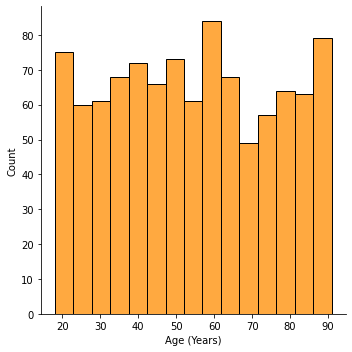

In [30]:
univariate_age = sns.displot(data = dataset, x = 'Age (Years)', bins = 15, color = 'darkorange')

### This plot shows age distribution of the customers

### b. the univariate plot for Dependents

       #fixing data errors in Dependents with seaborn itself

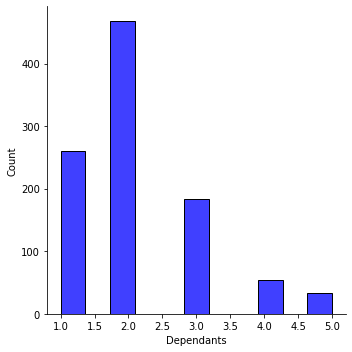

In [31]:
univariate_dependents = sns.displot(dataset['Dependants'].fillna(method='ffill'), color='blue') 

### This plot shows that close to 50% of the customers have 2 dependents, followed by 1 dependent(25% or thereabouts)
### Customers with 5 dependents are the least (less than 5%)

### c. the univariate plot for Age conditioned with Marital Satus

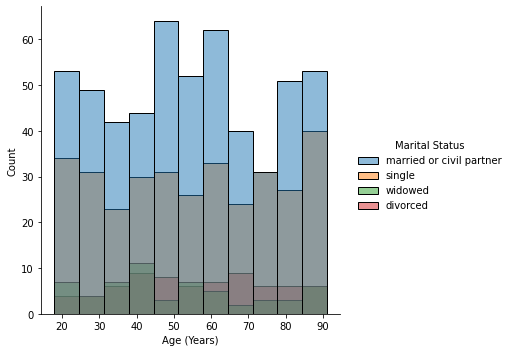

In [32]:
univariate_age_marital = sns.displot(data = dataset, x = 'Age (Years)', hue='Marital Status')

### This plot age disribution of the customer with respect to their marital status.

## Number 3: Perform multivariate plots with the following data attributes;
            a. Commuted distance against salary.
            b. Age against Salary
            c. Age against Salary conditioned by Dependants 

### a. multivariate plots with the Commuted distance against salary.

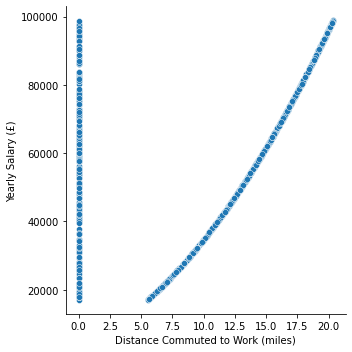

In [33]:
multivariate_distance_vs_salary = sns.relplot(data = dataset, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (£)')

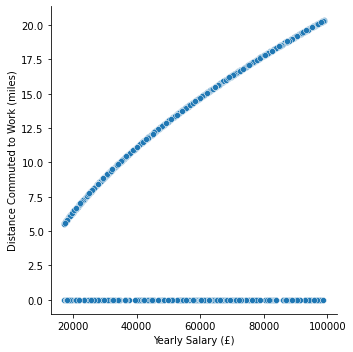

In [34]:
multivariate_salary_vs_distance = sns.relplot(data=dataset, x= 'Yearly Salary (£)', y= 'Distance Commuted to Work (miles)')

#### This plot shows that there is no statistical relationship or dependence between salary and distance commutted to work. Increased in distance commutted to work does not affect the Yearly Salary of the customer

### b. multivariate plots with the Age against Salary

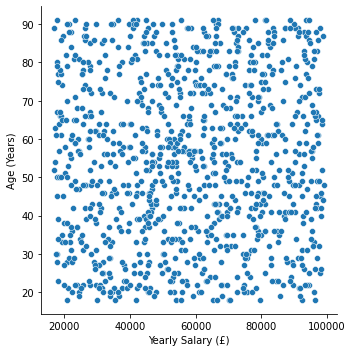

In [35]:
multivariate_age_vs_salary = sns.relplot(data = dataset, x = 'Yearly Salary (£)', y = 'Age (Years)')

### The relationship does not show a unique distribution between the age and salary.
### This implies that their 'Age' does not determine what they get as the 'Yearly Salary (£)'.

### c. Age against Salary conditioned by Dependants 

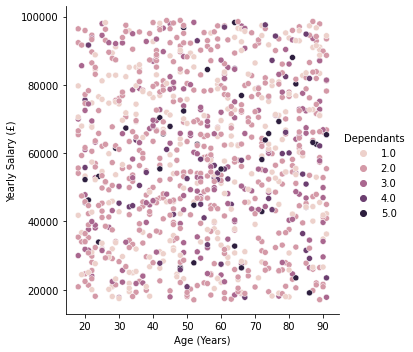

In [36]:
multivariate_age_vs_salary_dependents = sns.relplot(data = dataset, x = 'Age (Years)', y = 'Yearly Salary (£)', hue = 'Dependants')

### It is observed that customers with five dependents are little more concentrated in the ages of 35 years and above,..... 
### and Yearly Salary of £40,000 - £90,000.

### 4. Save the plots produced with their Notebook cells

In [37]:
univariate_age.savefig('./univariate_age.png')
univariate_dependents.savefig('./univariate_dependents.png')
univariate_age_marital.savefig('./univariate_age_marital.png')
multivariate_distance_vs_salary.savefig('./multivariate_distance_vs_salary.png')
multivariate_salary_vs_distance.savefig('./multivariate_salary_vs_distance.png')
multivariate_age_vs_salary.savefig('./multivariate_age_vs_salary.png')
multivariate_age_vs_salary_dependents.savefig('./multivariate_age_vs_salary_dependents.png')

In [38]:
figures_to_save = {}
figures_to_save["./univariate_age.png"] = univariate_age
figures_to_save["./univariate_dependents.png"] = univariate_dependents
figures_to_save["./univariate_age_marital.png"] = univariate_age_marital
figures_to_save["./multivariate_distance_vs_salary.png"] = multivariate_distance_vs_salary
figures_to_save["./multivariate_salary_vs_distance.png"] = multivariate_salary_vs_distance
figures_to_save["./multivariate_age_vs_salary.png"] = multivariate_age_vs_salary
figures_to_save["./multivariate_age_vs_salary_dependents.png"] = multivariate_age_vs_salary_dependents
figures_to_save

{'./univariate_age.png': <seaborn.axisgrid.FacetGrid at 0x7f78ac83afd0>,
 './univariate_dependents.png': <seaborn.axisgrid.FacetGrid at 0x7f789c5b6b50>,
 './univariate_age_marital.png': <seaborn.axisgrid.FacetGrid at 0x7f78b1493940>,
 './multivariate_distance_vs_salary.png': <seaborn.axisgrid.FacetGrid at 0x7f78b24f8df0>,
 './multivariate_salary_vs_distance.png': <seaborn.axisgrid.FacetGrid at 0x7f789c09ea00>,
 './multivariate_age_vs_salary.png': <seaborn.axisgrid.FacetGrid at 0x7f789c08f820>,
 './multivariate_age_vs_salary_dependents.png': <seaborn.axisgrid.FacetGrid at 0x7f789bf98d00>}

## Sources of materials and resuorses used for this assignment are;
### Class lectures and Notes by Brian Tompsett
### Week 1 - 4 Workshops led by Brian Tompsett
### https://stackoverflow.com/questions
### https://www.analyticsvidhya.com/blog
### https://stackabuse.com/
### https://seaborn.pydata.org/
### https://pandas.pydata.org/